# Data Scraping mit Python: Abschluss-Portfolio – Vergleich liberaler und konservativer Zeitungen/Medien in den USA

In diesem Notebook soll eine deskriptiv-explorative, vergleichende Analyse zweier amerikanischer Zeitungen und der Themen, über die dort berichtet wird, durchgeführt werden.

Folgendes Notebook gliedert sich wie folgt:

**1. Hintergrund: welche Medien wurden ausgewählt und auf was zielt die Analyse ab?**

**2. Technische Durchführung, Datenakquise**

**3. Aufbereitung erhaltener Daten und einige explorative Analysen**

**4. Ein kurzes abschließendes Fazit**

## 1. Hintergrund: welche Medien wurden ausgewählt und auf was zielt die Analyse ab?

Zunächst wird geklärt, welches Erkenntnisinteresse diesem Projekt zugrunde liegt – woraus sich nachfolgend auch die Auswahl der beiden Medien ergibt.

Es kann durchaus behauptet werden, dass die US-amerikanische politische Landschaft aktuell ein problematisches Bild abgibt. Gerade der Diskurs um "Fake News", der durch Donald Trumps Präsidentschaft sowie seine haltlosen Bemerkungen, dass ihm ein vermeintlicher Wahlsieg gegen Joe Biden bei der letzten Wahl durch gezielte Manipulation gestohlen worden wäre, trugen dazu bei. Die ohnehin starke Rivalität zwischen den konservativen Republikanern und den liberaleren Demokraten, die durchaus schon vor Trumps Präsidentschaft bestand, wurde jedoch durch eben diese verschärft: man bekommt als außenstehender Europäer immer mehr den Eindruck, es handele sich um regelrechte Grabenkämpfe – eine Metapher, die sich durch die traurigen Ereignisse des Sturms auf das US-Kapitol vom 6. Januar 2021 noch stärker aufdrängt.

Und dieses Bild der amerikanischen Politik lässt sich zu gewissen Teilen sicher auch auf die Medienlandschaft der USA übertragen. So konnte man unter dem letzten Präsidenten wohl einen starken Anstieg in der Wichtigkeit von Blogs und anderen News-Quellen feststellen, mit denen seine Anhänger ihre "alternativen Fakten" einholten.

In folgendem Portfolio soll deshalb folgende Frage im Zentrum stehen:

> ***Welche Themen werden in amerikanischen Print- bzw. Online-Medien behandelt und wo bestehen Unterschiede in der Berichterstattung zwischen traditionell liberalen und traditionell konservativen Zeitungen bzw. Nachrichtenagenturen?***

Dass diese angesprochenen unterschiedlichen Berichterstattungen durchaus als gegeben angenommen werden können und in der Realität innerhalb der amerikanischen Gesellschaft über die Zeit tiefe Gräben geöffnet haben, zeigen z. B. auch Iyengar und Westwood (2015) in ihrem Paper *Fear and Loathing across Party Lines: New Evidence on Group Polarization*. Es konnte mittels IATs (Implicit Association Tests) herausgearbeitet werden, dass zwischen republikanischen und demokratischen Parteimitgliedern teilweise schon eine derartig starke Polarisierung vorliegt, die auch in eine Diskriminierung der jeweils "feindlich" wahrgenommenen, anderen Gruppe umschlägt, die bezüglich ihrer Intensität eine Diskriminierung aufgrund von Ethnie bzw. Rassismus übersteigt.
Hier sei jedoch für vorliegendes Portfolio vor allem folgende Aussage herausgehoben, die etwas Licht darauf wirft, welche Gründe dafür vorliegen könnten:

> "In the contemporary American political environment, there is evidence of increasing hostility across partylines, which has been attributed to a variety of factors, including candidates’ reliance on negative campaigning and the availability of news sources with a clear partisan preference." (Iyengar & Westwood 2015, S. 691)

Hier wäre beispielsweise anzunehmen, dass sozusagen aus der "Ideologie" heraus in den konservativen Zeitungen das "America first"-Prinzip vorherrschend ist und daher viel über das Inland berichtet wird. Dem gegenüber könnte angenommen werden, dass in den liberaleren Zeitungen wohl eher die Prämisse eines "offeneren Amerikas" vorherrscht und hier im Gegenteil zu konservativen Zeitungen in Beiträgen auch andere, weniger auf die USA zentrierte Themen Aufmerksamkeit erfahren könnten.

Diese Vermutungen sollen mittels dieses Portfolios einer ersten explorativen Überprüfung unterzogen werden, damit sie durch Fakten untermauert werden können. Als Methode soll hier eine **Wordcloud** erstellt werden, die zeigen wird, welche Begriffe besonders oft in den Artikeln der jeweiligen Medien genutzt werden. Danach wird sich zeigen, ob sich daraus wirklich Rückschlüsse ziehen lassen und ob es Tendenzen wie die gibt, die zuvor beschrieben wurden.

Zwecks der dafür genutzten Medien soll auf der "liberalen Seite" auf die [New York Times](https://www.nytimes.com) zurückgegriffen werden. Als konservatives Gegenstück wurde sich für [Fox News](https://www.foxnews.com/) entschieden - ein Portal, das gerade in Bezug auf die "Fake News"-Debatte und Trumps Präsidentschaft ein Portal war, das besonders herausstach. Zunächst sollte außerdem die ebenfalls als "conservative-leaning" einzuordnende [Washington Times](https://www.washingtontimes.com) gewählt werden - doch hier ergaben sich beim Versuch, mittels der für das Portfolio gewählten NewsAPI Artikeldaten zu ziehen, einige Aktualitätsprobleme, weshalb sich zum Ende für den Ausschluss der WT entschieden wurde (offensichtlich wurde die genutzte API für dieses Medium nicht aktuell gehalten und die Zeitung selbst hat keine Programmierschnittstelle zum Zugriff auf derlei Informationen). Hier könnte sich, sollte das Projekt weiterverfolgt werden wollen, mittels direktem Scraping der Webseite beholfen werden. Diese Entscheidungen, welche Medien für welche politische "Seite" ausgewählt werden, wurden beispielsweise aufgrund von [Rankings der University of Michigan in Zusammenarbeit mit Hilfe von AllSides](https://guides.lib.umich.edu/c.php?g=637508&p=4462444) getroffen.

AllSides ist ein eigenes Nachrichten-Portal, welches wie der Name schon sagt versucht, "beide Seiten" des (nachrichten)politischen Spektrums zu erfassen und somit ein möglichst umfassendes Nachrichtenbild zu gewährleisten. Dort werden Seiten mit einem eigenen [Ranking](https://www.allsides.com/media-bias/media-bias-ratings) erfasst, auf welches von Seiten der University of Michigan und auch von Seiten dieses Portfolios zurückgegriffen wurde.
Es wurde dabei bewusst nur auf die Kategorien "lean left" und "lean right" geblickt, da u. a. auch Nachrichtenagenturen wie Breitbart erfasst wurden, welche von vorliegender Arbeit nicht wirklich als seriöse "traditionelle Nachrichtenquelle" erachtet wird.

## 2. Technische Durchführung, Datenakquise

Im zweiten Schritt sollen dann die Daten von den ausgewählten Medien-APIs gezogen werden. Dieser Paragraph soll kurz als Vorabklärung zu den verwendeten Ressouren dienen - etwaige geschriebene Funktionen werden dann jedoch an Ort und Stelle näher erläutert oder mit ausreichend erklärenden Kommentaren versehen.

Da im Falle der **New York Times** eine äußerst gut dokumentierte API vorliegt, welche auch mittels `requests` gut nutzbar ist - dies jedoch weder für die **Washington Times**, noch für **FoxNews** der Fall war, da es hier keine hauseigenen APIs gibt - wurde eine Lösung gesucht, die Ergebnisse liefern kann, welche auf Anhieb eine gute Vergleichbarkeit miteinander haben, um anschließendes Data Cleaning bzw. Data Wrangling zu minimieren. Außerdem wurde die Arbeit mittels API gegenüber einem direkten Scraping bevorzugt, da es im Bereich "News" hiervon sehr viele gute Alternativen gibt (z. B. [CurrentsAPI](https://www.currentsapi.services/en), [mediastack](https://mediastack.com/product) oder [NewsAPI](https://newsapi.org/)) und für ein direktes Scraping, besonders im Fall der **Washington Times**, nach einem Blick auf die `robots.txt`-Datei ein Unterlassungswunsch nicht komplett auszuschließen war (siehe [hier](https://washingtontimes.com/robots.txt)).

Es wurde sich am Ende schließlich für die **NewsAPI** entschieden - aus den pragmatischen und einfachen Gründen, dass es erstens für diese ein gut dokumentiertes und einfach anzuwendendes Python-Package gibt (`newsapi`) und zweitens hier mittels einer Abfrage direkt 100 Artikel gezogen werden können.
Von **Currents** wurde dann v. a. aus dem Grund abgesehen, da die Dokumentation im Vergleich zu **NewsAPI** eher mangelhaft ausfiel und nicht genug Informationen entnommen werden konnten, um einen anständigen Paginationsmechanismus zu definieren (sofern dieser bei **Currents** überhaupt möglich wäre).

In [200]:
# basis packages
import requests
import datetime as dt
import pandas as pd
import seaborn as sea
from pprint import pprint
from newsapi import NewsApiClient
import math
import json

# nachher für die datenbearbeitung und die wordcloud
import numpy
import re
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
# der apicode für die newsapi; muss in den client eingegeben werden
apicode = NewsApiClient(api_key="24723a0894f94deea8cf83a9efaca4d8")

### 2.1 Funktionen: Anfragen bei API

Nachfolgende Funktionen können zum Anfragen von Artikeln aus bestimmten Domains durch den API-Zugang der NewsAPI genutzt werden. Etwaige Schritte, die erklären, was genau welcher Abschnitt der Funktion tut, können aus den Kommentaren entnommen werden:

In [4]:
def scraper_paginate(domain, sorting):
    
    ## einmal die basisdaten auf grundlage von "domain" nach "sorting" ziehen und die resultate in "resultat" reinkopieren
    ## sorting könnte dabei verändert werden: publishedAt sortiert zeitlich und ist hier angebracht; man kann noch "popularity"
    ## suchen (dann macht aber domain keinen sinn mehr, soweit ich die dokumentation verstehe) oder nach "relevancy" (hier ist
    ## das verbunden mit einer direkten suche über den parameter "q" (für query))
    daten = apicode.get_everything(domains=f"{domain}", sort_by=f"{sorting}", page=1, page_size=100)
    resultat = daten["articles"].copy()
    
    ## oberes seitenlimit festlegen: die totalResults durch 100 (artikel pro seite) teilen und mit ceil sozusagen "aufrunden"
    ## das ergibt dann das maximale seitenlimit; abspeichern in objekt "seiten"
    seiten = math.ceil(daten["totalResults"]/100)
    
    ## for loop für pagination über "seiten"
    for i in range(2, seiten):
        ## erst initialabfrage erneut starten, diesmal ersetzt man für den "page"-parameter das objekt und iteriert
        ## ab seite 2 bis zum maximum (das objekt "seiten", vgl. oben) für 100 objekte pro seite
        new = apicode.get_everything(domains="nytimes.com", sort_by="publishedAt", page=i, page_size=100)
        ## die ergebnisse werden dann einfach mit der extend-methode an die obige artikelliste mit angehängt
        resultat.extend(new['articles'])
    
    ## sozusagen der abschlussparagraph der funktion: ein objekt wird geschaffen, in dem "resultat" als pd.DataFrame
    ## angelegt ist. dann wird darin noch "publishedAt" als datum identifiziert, sollte das später gebraucht werden
    df = pd.DataFrame(resultat)
    df["publishedAt"] = pd.to_datetime(df["publishedAt"])
    return df

In [5]:
# automatisieren des scrapings von newsapi mittels einer eigenen funktion, welche wiederum funktionen aus dem newsapi package
# verwendet
def scraper_newsapi(domain, sorting, page):
    ## apicode eingeben
    apicode = NewsApiClient(api_key="24723a0894f94deea8cf83a9efaca4d8")
    ## get_everything für die parameter der funktion
    data = apicode.get_everything(domains=f"{domain}", sort_by=f"{sorting}", page=page, page_size=100)
    ## aus dem ergebnis (data): herausziehen von den artikeln und kopieren in eigenes objekt
    articles = data['articles'].copy()
    ## einen pd.DataFrame aus articles machen, datum mit to_datetime als solches kennzeichnen und alles ausgeben lassen
    df = pd.DataFrame(articles)
    df["publishedAt"] = pd.to_datetime(df["publishedAt"])
    return df

In [6]:
scraper_paginate(domain="nytimes.com", sorting="publishedAt")

NewsAPIException: {'status': 'error', 'code': 'maximumResultsReached', 'message': 'You have requested too many results. Developer accounts are limited to a max of 100 results. You are trying to request results 100 to 200. Please upgrade to a paid plan if you need more results.'}

In [ ]:
scraper_newsapi(domain="nytimes.com", sorting="publishedAt", page=1)

In [7]:
scraper_newsapi(domain="nytimes.com", sorting="publishedAt", page=2)

NewsAPIException: {'status': 'error', 'code': 'maximumResultsReached', 'message': 'You have requested too many results. Developer accounts are limited to a max of 100 results. You are trying to request results 100 to 200. Please upgrade to a paid plan if you need more results.'}

### 2.2 Kurze Bemerkung zur Paginationsfunktion

Wie sicherlich auffallen dürfte, erhält man beim Ausführen der Funktion `scraper_paginate` eine Fehlermeldung, die darauf hinweist, dass es Probleme beim Abgreifen der nächsten 100 Artikel gegeben hat.

Diese Probleme erklären sich daraus, dass für das vorliegende Data Scraping-Projekt nur ein einfacher und *kostenloser* Developer-Zugang zur **NewsAPI** erworben wurde. Die Python-Fehlermeldung enthält auch die Information, dass für mehr als die ersten 100 Ergebnisse in jedem Fall ein Wechsel zu einem kostenpflichtigen Zugang nötig sei. Die Preise sind aber leider sehr hoch und lohnen sich erst dann, wenn man wirklich geschäftlich mit den Nachrichten-Daten aus der API arbeiten möchte - ein Business-Zugang, der nächsthöhere gegenüber dem Developer-Zugang, [kostet aktuell 449 Dollar pro Monat](https://newsapi.org/pricing).

Für das Portfolio ist jedoch vor allem ein "proof of concept" relevant, welcher durch die Funktion `scraper_paginate` gegeben ist: dass überhaupt diese Fehlermeldung erscheint, ist ein Hinweis darauf, dass *eigentlich erfolgreich* auf die nächsten 100 Artikel zugegriffen werden hätte können.

Um dennoch Artikel aus der Schnittstelle anfragen zu können, wurde dann die Funktion `scraper_newsapi` geschrieben. Darin ist die Iteration für die Pagination nicht mehr enthalten und es wird bewusst nur "Seite 1" mit den ersten 100 Artikeln angesteuert. Der Rest der ist mit der Funktion `scraper_paginate` identisch.

Es wäre alternativ auch denkbar gewesen, jede Seite mittels dieser Funktion dann *individuell anzusteuern*. Doch da auch dies, wie aus den vorigen Notebook-Zellen hervorgeht, leider nicht möglich war, wurde sich dann einfach dazu entschlossen, dass die 100 ersten Artikel als Daten für dieses Portfolio verwendet werden.

## 3. Aufbereitung erhaltener Daten und einige explorative Analysen

Nachdem nun der Abschnitt zur Methodik abgeschlossen wurde, wird im nächsten Schritt in die Praxis übergegangen. Es werden im Folgenden, wie angekündigt, für die **New York Times**, die **Washington Times** und für **FoxNews** Nachrichtendaten in Form von Artikeln auf deren Webseiten mittels der API gezogen.

Anschließend werden in einem zweiten Schritt die **Wordclouds** für die 100 der aktuellsten Nachrichtenartikel der drei Portale erstellt werden, bevor dann im Fazit genauer auf deren Implikationen eingegangen wird. Um hierfür die Daten vorzubereiten, werden erneut Funktionen eingeführt.

### 3.1 Funktionen zur Bearbeitung der gewonnenen Daten und zur Analyse

Diese Funktion soll in der kommenden Zelle näher definiert werden. Die Gedanken dahinter sind wie folgt:

`vorbereitung_dfs`: Diese Funktion dient der Vorbereitung einer wählbaren Spalte in einem wählbaren Datensatz, welche für die Bearbeitung mittels Schlüsselworterkennung möglich machen. Es werden NA-Werte entfernt, sofern vorhanden, Text wird pauschal in Kleinbuchstaben umgewandelt, da Python Sprache auf diese Weise besser erfasst und Sätze werden in ihre einzelnen Bestandteile aufgespalten (d. h. Wörter, aber auch die Satzzeichen)

In [8]:
## vorbereitungsfunktion: NAs raus --- lowercase --- sätze splitten (tokenization)
def vorbereitung_dfs(i, a):
    # NAs rausschmeißen
    i[f'{a}'].dropna(inplace=True)
    
    # alles in kleinbuchstaben umwandeln
    i[f'{a}'] = [entry.lower() for entry in i[a]]
    
    # tokenization: erstellen einzelner worte
    i[f'{a}'] = [word_tokenize(entry) for entry in i[a]]
    
    return i

In [212]:
## funktion für die wordclouds (erspart dann tippen)
def wordcloud_erstellen_für(wortliste):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width = 1000, height = 1000, background_color="black", colormap="Blues", stopwords=stopwords).generate(wortliste)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

### 3.1 Zur New York Times

Zuerst also zur New York Times. Wie zu sehen ist, arbeitet `scraper_newsapi` wie vorgesehen und gewünscht und liefert einen `pd.DataFrame` mit den gewünschten 100 Artikeln, der bei Bedarf dann auch als `.csv`-Datei gespeichert werden könnte:

In [176]:
nytimes_base = scraper_newsapi(domain="nytimes.com", sorting="publishedAt", page=1)

In [185]:
nytimes_base
# bei bedarf kann auch gespeichert werden
# nytimes_base.to_csv("nytimes_base.csv", encoding="UTF-8")

,source,author,title,description,url,urlToImage,publishedAt,content,text_final
0,"{'id': None, 'name': 'New York Times'}",Raymond Zhong,China Plans Security Checks for Tech Companies...,"[the, proposed, rules, would, close, a, gap, t...",https://www.nytimes.com/2021/07/10/technology/...,https://static01.nyt.com/images/2021/07/10/bus...,2021-07-10 12:05:59+00:00,"Chinas internet regulator, the Cyberspace Admi...","'propose', 'rule', 'would', 'close', 'gap', 'l..."
1,"{'id': None, 'name': 'New York Times'}",Jenny Gross,Does Free College Work?,"[president, biden, ’, s, $, 109, billion, plan...",https://www.nytimes.com/2021/07/10/business/de...,https://static01.nyt.com/images/2021/07/10/bus...,2021-07-10 12:00:04+00:00,"Yes, we believe that all students have the pot...","'president', 'biden', 'billion', 'plan', 'free..."
2,"{'id': None, 'name': 'New York Times'}",Dave Philipps,Hidden Costs and Flawed Training Plague the V....,"[a, $, 16, billion, effort, to, modernize, hea...",https://www.nytimes.com/2021/07/09/us/va-healt...,https://static01.nyt.com/images/2021/07/09/us/...,2021-07-10 10:05:05+00:00,The departments official test results told a d...,"'billion', 'effort', 'modernize', 'health', 'r..."
3,"{'id': None, 'name': 'New York Times'}",None,Gen Z could free the world from Email,"[but, members, of, gen, z, seem, to, agree, wi...",https://www.nytimes.com/2021/07/09/business/ge...,https://images.moneycontrol.com/static-mcnews/...,2021-07-10 09:24:42+00:00,Sophia June\r\nDespite the reasonable qualms o...,"'member', 'gen', 'z', 'seem', 'agree', 'elder'..."
4,"{'id': None, 'name': 'New York Times'}",The New York Times,U.S. and Colombia Will Work With Haiti to Inve...,"[haitian, officials, are, also, looking, into,...",https://www.nytimes.com/live/2021/07/10/world/...,https://static01.nyt.com/images/2021/07/10/wor...,2021-07-10 09:11:27+00:00,"LiveUpdated July 10, 2021, 4:47 a.m. ET\r\nJul...","'haitian', 'official', 'also', 'look', 'whethe..."
...,...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'New York Times'}",Tara Siegel Bernard,The Gift of Financial Education for the New Gr...,"[a, little, professional, advice, goes, a, lon...",https://www.nytimes.com/2021/07/09/your-money/...,https://static01.nyt.com/images/2021/07/07/bus...,2021-07-09 13:00:08+00:00,"Then, after money is set aside to cover essent...","'little', 'professional', 'advice', 'go', 'lon..."
96,"{'id': None, 'name': 'New York Times'}",Norm Alster,How to Manage Your Money if Inflation Flares,"[while, long-term, investors, may, want, to, s...",https://www.nytimes.com/2021/07/09/business/mo...,https://static01.nyt.com/images/2021/07/11/bus...,2021-07-09 13:00:08+00:00,"Jason Bloom, head of fixed income and alternat...","'investor', 'may', 'want', 'stick', 'standard'..."
97,"{'id': None, 'name': 'New York Times'}",Norm Alster,How to Manage Your Money if Inflation Flares,"[while, long-term, investors, may, want, to, s...",https://www.nytimes.com/2021/07/09/business/ho...,https://static01.nyt.com/images/2021/07/11/bus...,2021-07-09 13:00:07+00:00,"Jason Bloom, head of fixed income and alternat...","'investor', 'may', 'want', 'stick', 'standard'..."
98,"{'id': None, 'name': 'New York Times'}",Rory Smith,Copa América Final: Lionel Messi Tries to Slay...,"[saturday, ’, s, copa, américa, final, against...",https://www.nytimes.com/2021/07/09/sports/socc...,https://static01.nyt.com/images/2021/07/09/spo...,2021-07-09 13:00:05+00:00,"His retort, and Argentinas, would doubtless be...","'saturday', 'copa', 'américa', 'final', 'brazi..."


In [178]:
nytimes_vorbereitet = vorbereitung_dfs(nytimes_base, "description")

In [179]:
# wn (wordnet): funktion zur lemmatization der wörter; hat als default nomen
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
    
# forloop: für jeden eintrag in aufgelisteter spalte "description" des vorbereiteten pd.DataFrame
for index,entry in enumerate(nytimes_vorbereitet["description"]):
    # leere liste erstellen
    Final_words = []
    # die lemmatization-funktion als objekt sichern
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag ("parts of speech") aus dem nlp-package nltk: das wird für jeden eintrag festlegen, welche wortart es ist
    for word, tag in pos_tag(entry):
        # prüfung für stopwords (also z. B. "by", "the", usw.) und ob es sich um ein wirkliches wort handelt (isalpha checkt
        # auf buchstaben). wenn abgeschlossen, wird dieses objekt an die leere liste geklebt
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # die leere liste wird an den datensatz als neue column geklebt
    nytimes_neue = nytimes_vorbereitet
    nytimes_neue.loc[index,'text_final'] = str(Final_words)
    
## aus transparenzgründen: diese funktion zur lemmatization habe ich mir von auswärts geholt,
## da ich bisher keine erfahrung mit nlp habe/hatte. ich habe aber, wie den kommentaren zu entnehmen ist, 
## nachvollzogen, wie die funktionen arbeiten. in dem artikel wurde das dann eingesetzt, um ein machine learning modell zu
## bauen um artikel zu kategorisieren. da mir das zu abgehoben erschien und ich das noch nie gemacht habe und auch die 
## algorithmen dahinter in der kurzen zeit nicht verstehen konnte, habe ich davon abgesehen und mich für eine wordcloud
## entschieden.

In [180]:
nytimes_neue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   source       100 non-null    object             
 1   author       97 non-null     object             
 2   title        100 non-null    object             
 3   description  100 non-null    object             
 4   url          100 non-null    object             
 5   urlToImage   100 non-null    object             
 6   publishedAt  100 non-null    datetime64[ns, UTC]
 7   content      100 non-null    object             
 8   text_final   100 non-null    object             
dtypes: datetime64[ns, UTC](1), object(8)
memory usage: 7.2+ KB


In [182]:
# in vorbereitung auf die wordcloud brauche ich aus der spalte "text_final" nur die strings, außerhalb einer liste:
nytimes_neue["text_final"] = nytimes_neue["text_final"].str.strip('[]')

# wörter aus den columns mit leerzeichen dazwischen joinen, dann für den coltext den datentyp string deklarieren
nytimes_text = " ".join(coltext for coltext in nytimes_neue.text_final.astype(str))

# für die wordcloud, da es besser aussieht: die single quotes entfernen
nytimes_text = nytimes_text.replace("'", "")

# hier bei bedarf den kommentar entfernen um die textliste zu sehen:
#nytimes_text

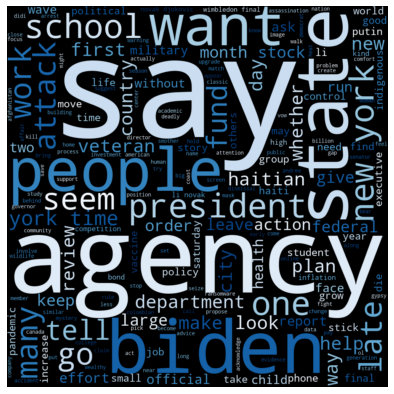

In [215]:
# wordlist generieren und erstmals anzeigen:
wordcloud_erstellen_für(nytimes_text)

In [214]:
# wörter noch zählen
zählung_nytimes = Counter(nytimes_text.split())
    
for wort, anzahl in zählung_nytimes.most_common(5):
    print(wort, anzahl)

say, 12
new, 10
agency, 9
could, 8
biden, 7


Für die ersten 100 Artikel in der NYT wurden nun also sowohl eine Wordcloud erstellt als auch überprüft, *wie oft in Zahlen* die Wörter in besagten Artikeln genutzt wurden. Um nun die Ergebnisse des Wortzählungs-Outputs etwas anschaulicher darzustellen, wird auf die Markdown-Funktionen von Jupyter zurückgegriffen [^1] :

|**Wort** | **Anzahl |
|-------- |----------|
| 'say' | 12 |
| 'new' | 10 |
| 'agency' | 9 |
| 'could' | 8 |
| 'biden' | 7 |

[^1]: Zum Zeitpunkt des Ausführens wurden diese Zahlen ausgegeben.

Was hier v. a. in der Wordcloud auffällt, sind die Worte *president*, *biden*, *agency* und *new*. Da bewusst eine explorative Analyse angekündigt wurde, könnte eine jedenfalls äußerst gewagte Interpretation sein, diese Worte in Verbindung zueinander zu setzen und die Präsidentschaft des neuen US-Präsidenten Biden positiv als "Erneuerung" für das Land zu deuten (wenn *agency* mit z. B. Handlungsmacht oder Wirkung übersetzt wird). Andererseits ist der Name der Zeitung auch "NEW York Times" und *agency* sich genauso gut auch auf die unterschiedlichen Fotoagenturen beziehen könnte, welche die Medien für Artikel bereitstellen, weshalb eine solche Interpretation vielleicht verlockend wirkt, jedoch mit Sicherheit bei der noch zu geringen Datenmenge zu weit hergeholt ist. Weitere Worte, die daneben auffallend sind, sind z. B. *one*, *school* oder auch *people*. Im Zuge des Attentates auf den Präsidenten Haitis ist auch das Auftauchen von *haitian* und *attack* zu sehen. Überraschend wenig wurde aktuell, auf Grundlage der Wordcloud, über das Coronavirus berichtet (*corona* und *virus* tauchen auf den ersten Blick gar nicht auf, *vaccine* und *pandemic* nur sehr spärlich).
Schaut man auf die nackten Zahlen der ersten fünf meistgenannten Worte, so finden sich darüber hinaus oft genutzte, einfache Worte wie *say*, *could* oder *want*.

### 3.2 Zu FoxNews

In [188]:
foxnews_base = scraper_newsapi(domain="foxnews.com", sorting="publishedAt", page=1)

In [189]:
#foxnews_base

In [190]:
foxnews_vorbereitet = vorbereitung_dfs(foxnews_base, "description")

In [191]:
#foxnews_vorbereitet

In [192]:
# wn (wordnet): funktion zur lemmatization der wörter; hat als default nomen
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
    
# forloop: für jeden eintrag in aufgelisteter spalte "description" des vorbereiteten pd.DataFrame
for index,entry in enumerate(foxnews_vorbereitet["description"]):
    # leere liste erstellen
    Final_words = []
    # die lemmatization-funktion als objekt sichern
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag ("parts of speech") aus dem nlp-package nltk: das wird für jeden eintrag festlegen, welche wortart es ist
    for word, tag in pos_tag(entry):
        # prüfung für stopwords (also z. B. "by", "the", usw.) und ob es sich um ein wirkliches wort handelt (isalpha checkt
        # auf buchstaben). wenn abgeschlossen, wird dieses objekt an die leere liste geklebt
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # die leere liste wird an den datensatz als neue column geklebt
    foxnews_neue = foxnews_vorbereitet
    foxnews_neue.loc[index,'text_final'] = str(Final_words)

In [193]:
#foxnews_neue

In [195]:
# in vorbereitung auf die wordcloud brauche ich aus der spalte "text_final" nur die strings, außerhalb einer liste:
foxnews_neue["text_final"] = foxnews_neue["text_final"].str.strip('[]')

# wörter aus den columns mit leerzeichen dazwischen joinen, dann für den coltext den datentyp string deklarieren
foxnews_text = " ".join(coltext for coltext in foxnews_neue.text_final.astype(str))

# für die wordcloud, da es besser aussieht: die single quotes entfernen
foxnews_text = foxnews_text.replace("'", "")

# hier bei bedarf den kommentar entfernen um die textliste zu sehen:
#foxnews_text

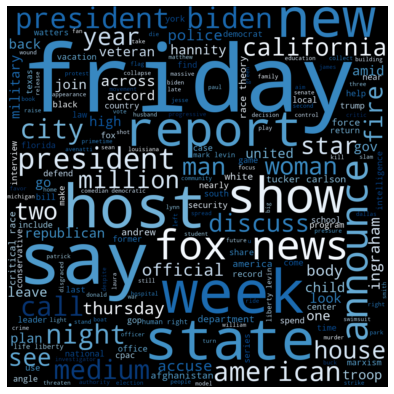

In [196]:
wordcloud_erstellen_für(foxnews_text)

In [197]:
# wörter noch zählen
zählung_fox = Counter(foxnews_text.split())
    
for wort, anzahl in zählung_fox.most_common(5):
    print(wort, anzahl)

friday, 28
say, 18
president, 14
host, 12
fox, 11


Auch für FoxNews sollen die gezählten Worte dann wieder in eine ansprechende Form gebracht werden [^2] :

|**Wort** | **Anzahl** |
|-------- |----------|
| 'friday' | 28 |
| 'say' | 18 |
| 'president' | 14 |
| 'host' | 12 |
| 'fox' | 11 |

[^2]: Zum Zeitpunkt des Ausführens wurden diese Zahlen ausgegeben

Hier fällt zunächst auf, dass Wörter öfter vorkommen, als dies bei der NYT der Fall gewesen ist. Und blickt man auf die Tabelle, so wird deutlich, dass z. B. das Wort *friday* 28 Mal genannt wurde. Dies dürfte mit dem Zeitpunkt des Scrapings zusammenhängen.
Ein Unterschied ist, dass zwar das Wort *president* wesentlich öfter vorkam, als in der NYT (dort nicht unter den Top 5 meistgenannten Wörtern), jedoch in der Wordcloud im Verhältnis kleiner dargestellt wurde, da der Abstand zu *friday* nicht unwesentlich war. Deshalb rechtfertigt das auch eine Prüfung der genauen Anzahl der genannten Wörter, da auf diese Weise solche dem Verhältnis geschuldeten Wahrnehmungen erkannt werden können. Dass *american* und auch *president* derartig oft vorkommen, könnte ein Indiz in die Richtung sein, welche zu Beginn beschrieben wurde: es könnte sich andeuten, dass viele Berichte über Joe Bidens Amtshandlungen als Präsident innerhalb der USA geschrieben werden (oder dass auch über mögliche neue Kandidaten für dieses Amt bei den Republikanern spekuliert wird) - in jedem Fall könnte dies aber ein erstes Indiz dafür sein, dass sich oft mit politischen Themen auseinandergesetzt wird; nimmt man hierzu noch das Wort *state* (vgl. Wordcloud), so könnte man durchaus sagen, dass es hierbei um die einzelnen Staaten der USA handelt, und damit um *Innen*politik.

Doch auch hier ist, wie bei der NYT, feststellbar, dass das Coronavirus und die Pandemie wohl nicht zu den dominierenden Themen in den amerikanischen Nachrichten gehören - dazu lassen sich keine Schlagworte ausmachen. Was ebenso bei genauerem Hinsehen auffällt, ist, dass bei FoxNews die Begriffe *military*, *troops* und auch *afghanistan* vorkommen (wenn auch, der Wordcloud nach zu urteilen, nicht allzu oft). Dennoch hätte dem, sofern mehr Daten vorhanden gewesen wären, nachgegangen werden können - aus dem Motiv heraus, dass Schlagworte aus dem militärischen Bereich gut in den konservativ-republikanischen Jargon passen würden.

## 4. Fazit und Verbesserungen

+ Für Namen der Zeitungen bei Tokenization/Lemmatization filtern bzw. kontrollieren (z. B. "zähle 'new' nicht, wenn danach 'york times' genannt wird")

+ Für mehr Artikel sorgen, da sonst doch die Masse etwas klein ausfällt, gerade wenn man in die Richtung Sentimentanalyse geht oder wenn man Wordclouds machen möchte - das ist interessanter und aufschlussreicher mit mehr Daten

Was abschließend zu sagen bleibt, ist, dass die durchgeführte Analyse nur ein erster Einblick wäre. Man könnte zu diesem Thema sicherlich noch wesentlich tiefer einsteigen - jedoch wäre dafür entweder ein bezahltes Abonnement bei **NewsAPI** oder eine andere Quelle für die gezogenen Nachrichtendaten notwendig.

Wenn das Thema weiter verfolgt werden würde, müsste zudem auch an der Lemmatisierung der Worte gearbeitet werden: Wörter wie *friday* oder auch andere oft genutzte Wörter wie *say* oder *could* müssten zu den "stopwords" hinzugefügt werden. Die Funktion dafür und das Ergebnis könnten dann folgendermaßen aussehen:

In [210]:
def wordcloud_erstellen_stopwords(wortliste, stops):
    ## mit den nächsten beiden Zeilen könnten dann eigene stopwords angegeben werden
    stopwords = set(STOPWORDS)
    stopwords.update(stops)
    wordcloud = WordCloud(width = 1000, height = 1000, background_color="black", colormap="Blues",
                          stopwords=stopwords).generate(wortliste)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

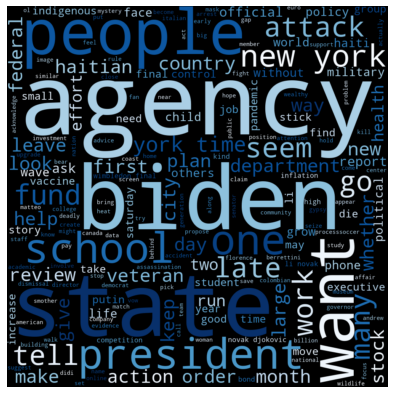

In [211]:
wordcloud_erstellen_für(nytimes_text, stops=["say", "could"])

Die neue Wordlist wird nicht nochmals genau analysiert - es wird jedoch schon auf den ersten Blick deutlich, dass die beiden ausgeschlossenen Wörter *say* und *could* nicht mehr enthalten sind. Auf diese Weise wäre es für den Anwender der Funktion dann einfach möglich, zu den ohnehin vorhandenen Stopwords noch eigene Ausdrücke hinzuzufügen.

Thematisch kann als Fazit ebenfalls nur darauf hingewiesen werden: es sind interpretatorisch in keinem Fall endgültige und zuverlässige Rückschlüsse auf die im Theoriebereich angedeuteten Tendenzen mit den vorliegenden Daten möglich. Eine Analyse müsste viel tiefgreifender vorgehen, es müssten mehr Daten gezogen werden und es könnte darüber hinaus dann bezüglich einer Strukturierung auch mit Natural Language Processing-Modellen aus dem Bereich des Machine Learning gearbeitet werden, um die erhaltenen Artikel auf Grundlage der genutzten Wörter zu in eigenen Kategorien (z. B. Politik/Inland, Politik/Ausland, Sport, Wirtschaft, ...) zu klassifizieren.

Einen guten Orientierungspunkt, welche Dinge in dem Bereich möglich wären, bietet z. B. der Google Cloud-Dienst ***Google Cloud Natural Language***, nähere Informationen finden sich [hier](https://cloud.google.com/natural-language/).

Insgesamt erachtet der Autor des vorliegenden Portfolios gerade die Arbeit mit Sprache und Texten (nicht nur, aber besonders auch in der politikwissenschaftlichen Forschung) als extrem aufschlussreich und die Entwicklungen im Bereich des NLP, auch und gerade mittels Python oder R, dürften in Zukunft in spannende Richtungen weiterentwickelt werden. Hierfür dürften dann die Fähigkeiten, welche im Bereich Data- und Webscraping vorliegen, von großem Nutzen sein.

# 5. Kurze Literaturangabe

**IYENGAR**, Shanto; **WESTWOOD**, Sean J.: *Fear and Loathing across Party Lines: New Evidence on Group Polarization*, American Journal of Political Science, Vol. 59, Iss. 3, S. 690-707.